In [129]:
import pandas as pd
import geopandas as gpd
from tabulate import tabulate
import numpy as np
from matplotlib import pyplot as plt

In [130]:
data=gpd.read_file("../../20_intermediate_files/30_campuses_w_dist_to_nearest_pp.geojson")

In [132]:
data = data[['UNIQUEID', 'NAME', 'STATE', 'COUNTY', 'Institution Type', 
       'MSI', 'Latitude_2020', 'Longitude_2020','distances_2020', 'distances_2020_early', 'Region',
       'POPPCT_URBAN','POPPCT_RURAL']]#, '2020_early_distance_by_walking (miles)',
       #'2020_distance_by_walking (miles)', 'geometry']]

In [133]:
#We need to make sure we don't have missing values for 2020 distances or 2020_early distances
#Check if True
data['UNIQUEID'].count() == data['distances_2020'].count() == data['distances_2020_early'].count()

True

### What percentage of schools across all 50 states have on-campus ED polling places? Have early voting sites? (It would be helpful to see this in 3 ways: % with ED site, % with EV, combined with % with on-campus voting options generally)

In [134]:
ed_count = data[data['distances_2020']==0]['UNIQUEID'].count()
ev_count = data[data['distances_2020_early']==0]['UNIQUEID'].count()
combo_count = data[(data['distances_2020']==0) | (data['distances_2020_early']==0)]['UNIQUEID'].count()
college_count = data['UNIQUEID'].count()

In [135]:
table = [['Percentage of Schools With On-Campus Election Day Polling Places', str(np.round(100*ed_count/college_count,2)) + '%'],
         ['Percentage of Schools With On-Campus Early Voting Sites', str(np.round(100*ev_count/college_count,2)) + '%'],
         ['Percentage of Schools With On-Campus Voting Options (Any)', str(np.round(100*combo_count/college_count,2)) + '%']]

In [136]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════════════════════════════════════════════════════════╤══════════╕
│ Percentage of Schools With On-Campus Election Day Polling Places   │ 24.19%   │
╞════════════════════════════════════════════════════════════════════╪══════════╡
│ Percentage of Schools With On-Campus Early Voting Sites            │ 9.44%    │
├────────────────────────────────────────────────────────────────────┼──────────┤
│ Percentage of Schools With On-Campus Voting Options (Any)          │ 25.97%   │
╘════════════════════════════════════════════════════════════════════╧══════════╛


### What percentage of schools are more than 1 mile from their nearest voting site? (Similar to above, 3 numbers: EV, ED, combined.)

In [11]:
ed_count_1 = data[data['2020_distance_by_walking (miles)'] > 1]['UNIQUEID'].count()
ev_count_1 = data[data['2020_early_distance_by_walking (miles)'] > 1]['UNIQUEID'].count()
combo_count_1 = data[(data['2020_distance_by_walking (miles)'] > 1) & (data['2020_early_distance_by_walking (miles)'] > 1)]['UNIQUEID'].count()

In [12]:
table = [['Percentage of Schools With Nearest Election Day Polling Place More Than 1 Mile Away', str(np.round(100*ed_count_1/college_count,2)) + '%'],
         ['Percentage of Schools With Nearest Early Voting Site More Than 1 Mile Away', str(np.round(100*ev_count_1/college_count,2)) + '%'],
         ['Percentage of Schools With Nearest Voting Option (Any) More Than 1 Mile Away', str(np.round(100*combo_count_1/college_count,2)) + '%']]

In [13]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════════════════════════════════════════════════════════════════════╤══════════╕
│ Percentage of Schools With Nearest Election Day Polling Place More Than 1 Mile Away   │ 52.94%   │
╞═══════════════════════════════════════════════════════════════════════════════════════╪══════════╡
│ Percentage of Schools With Nearest Early Voting Site More Than 1 Mile Away            │ 75.61%   │
├───────────────────────────────────────────────────────────────────────────────────────┼──────────┤
│ Percentage of Schools With Nearest Voting Option (Any) More Than 1 Mile Away          │ 46.61%   │
╘═══════════════════════════════════════════════════════════════════════════════════════╧══════════╛


### Of the polling sites that exist on campuses, what percentage are on PWIs vs. MSIs?

In [137]:
# Re-Label MSI's

data = data.replace({'MSI': {'HBCU': 'HBCU/PBI', 'PBI': 'HBCU/PBI', 'AANAPISI & HSI': 'Other', 
                      'AANAPISI': 'Other', 'ANNH & NASNTI': 'Other', 'ANNH': 'Other',
                     'NASNTI': 'Other', 'HSI & PBI': 'Other', ' ': 'PWI'}})

In [138]:
### Classify Urban or Rural

data['urb_rur'] =  data['POPPCT_URBAN'] > data['POPPCT_RURAL']
data['urb_rur'] = data['urb_rur'].replace(True, 'URBAN')
data['urb_rur'] = data['urb_rur'].replace(False, 'RURAL')

In [139]:
data_pwi = data[data['MSI'] == 'PWI']
data_hbcu = data[data['MSI'] == 'HBCU/PBI']
data_hsi = data[data['MSI'] == 'HSI']
data_other = data[data['MSI'] == 'Other']

In [140]:
def msi_table(df):
    urb_count = df[(df['urb_rur'] == 'URBAN') & ((df['distances_2020']==0) | (df['distances_2020_early']==0))]['UNIQUEID'].count()
    rur_count = df[(df['urb_rur'] == 'RURAL') & ((df['distances_2020']==0) | (df['distances_2020_early']==0))]['UNIQUEID'].count()
    combo_count = df[(df['distances_2020']==0) | (df['distances_2020_early']==0)]['UNIQUEID'].count()
    college_count = df['UNIQUEID'].count()
    urban_count = df[df['urb_rur'] == 'URBAN']['UNIQUEID'].count()
    rural_count = df[df['urb_rur'] == 'RURAL']['UNIQUEID'].count()
    table = [['{} Statistics'.format(df['MSI'].iloc[0]),' '],
        ['Percentage of Urban Schools With On-Campus Voting Options (Any)', str(np.round(100*urb_count/urban_count,2)) + '%'],
         ['Percentage of Rural Schools With On-Campus Voting Options (Any)', str(np.round(100*rur_count/rural_count,2)) + '%'],
         ['Percentage of Schools With On-Campus Voting Options (Any)', str(np.round(100*combo_count/college_count,2)) + '%']]
    return tabulate(table, headers='firstrow', tablefmt='fancy_grid')

In [141]:
print(msi_table(data_pwi))

╒═════════════════════════════════════════════════════════════════╤════════╕
│ PWI Statistics                                                  │        │
╞═════════════════════════════════════════════════════════════════╪════════╡
│ Percentage of Urban Schools With On-Campus Voting Options (Any) │ 24.25% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Rural Schools With On-Campus Voting Options (Any) │ 15.77% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Schools With On-Campus Voting Options (Any)       │ 22.19% │
╘═════════════════════════════════════════════════════════════════╧════════╛


In [142]:
print(msi_table(data_hbcu))

╒═════════════════════════════════════════════════════════════════╤════════╕
│ HBCU/PBI Statistics                                             │        │
╞═════════════════════════════════════════════════════════════════╪════════╡
│ Percentage of Urban Schools With On-Campus Voting Options (Any) │ 31.91% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Rural Schools With On-Campus Voting Options (Any) │ 31.03% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Schools With On-Campus Voting Options (Any)       │ 31.71% │
╘═════════════════════════════════════════════════════════════════╧════════╛


In [143]:
print(msi_table(data_hsi))

╒═════════════════════════════════════════════════════════════════╤════════╕
│ HSI Statistics                                                  │        │
╞═════════════════════════════════════════════════════════════════╪════════╡
│ Percentage of Urban Schools With On-Campus Voting Options (Any) │ 39.33% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Rural Schools With On-Campus Voting Options (Any) │ 40.0%  │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Schools With On-Campus Voting Options (Any)       │ 39.34% │
╘═════════════════════════════════════════════════════════════════╧════════╛


In [144]:
print(msi_table(data_other))

╒═════════════════════════════════════════════════════════════════╤════════╕
│ Other Statistics                                                │        │
╞═════════════════════════════════════════════════════════════════╪════════╡
│ Percentage of Urban Schools With On-Campus Voting Options (Any) │ 41.58% │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Rural Schools With On-Campus Voting Options (Any) │ 8.33%  │
├─────────────────────────────────────────────────────────────────┼────────┤
│ Percentage of Schools With On-Campus Voting Options (Any)       │ 38.05% │
╘═════════════════════════════════════════════════════════════════╧════════╛


### What percentage of schools in GA, NC, TX, and FL respectively have early voting options on campus? How does this compare to other states in the country? i.e. do they have fewer schools with early voting options, about the same, or more?

In [145]:
state_df = pd.DataFrame(data.groupby(['STATE','Region'])['distances_2020_early'].count())

In [146]:
state_df = state_df.reset_index()

In [147]:
state_df_early = pd.DataFrame(data[data['distances_2020_early']==0].groupby(['STATE'])['distances_2020_early'].count())

In [148]:
early_by_state = state_df.merge(state_df_early, on=['STATE'], how='outer')
early_by_state = early_by_state.fillna(value=0)
early_by_state.columns=['STATE','Region','total_schools_ev','on_campus_ev']
early_by_state['pct'] = early_by_state['on_campus_ev']/early_by_state['total_schools_ev']
#Handle NA's from dividing by 0
early_by_state = early_by_state.fillna(value=0)
early_by_state['pct'] = np.round(100*early_by_state['pct'],2)
early_by_state = early_by_state.sort_values(by=['pct'])

In [149]:
states = ['GA','NC','TX','FL']

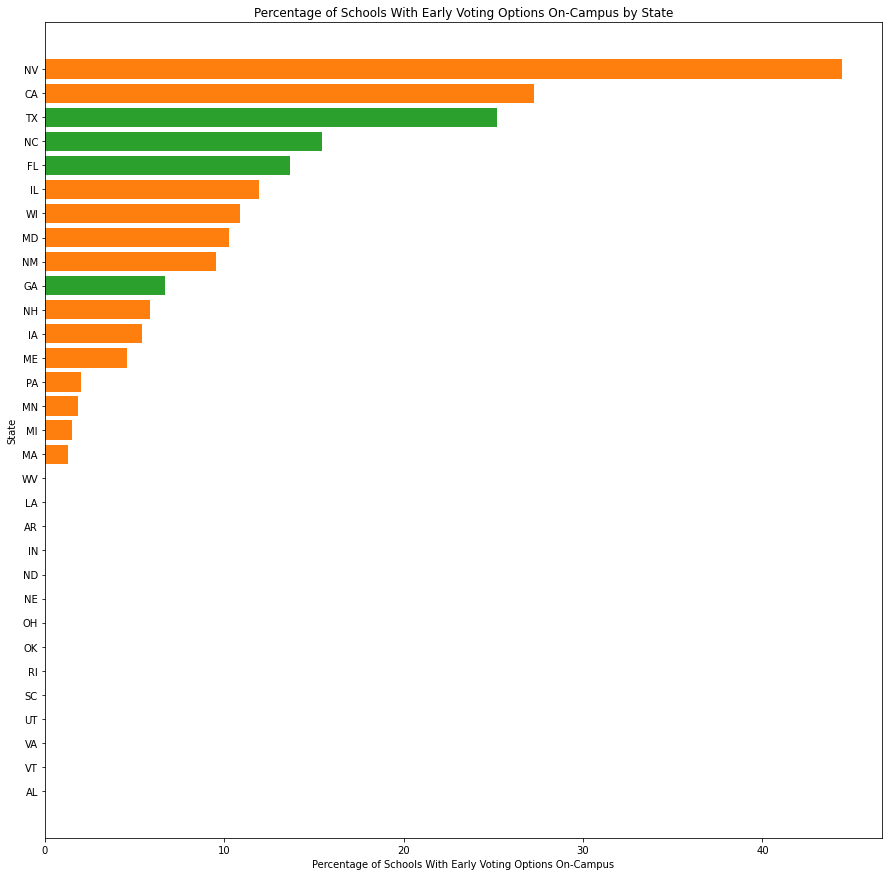

In [152]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
c = ['C2' if i in states else 'C1' for i in early_by_state['STATE']]
ax.barh(y=early_by_state.STATE,width=early_by_state.pct,color=c)
ax.set_title('Percentage of Schools With Early Voting Options On-Campus by State')
ax.set_xlabel('Percentage of Schools With Early Voting Options On-Campus')
ax.set_ylabel('State')
ax.grid(False)

### Is there a case to be made for why GA, NC, TX, and FL are the states where we should focus our efforts in 2022? How do the distances to polling places for schools in these states compare to other states in the region? In the country?

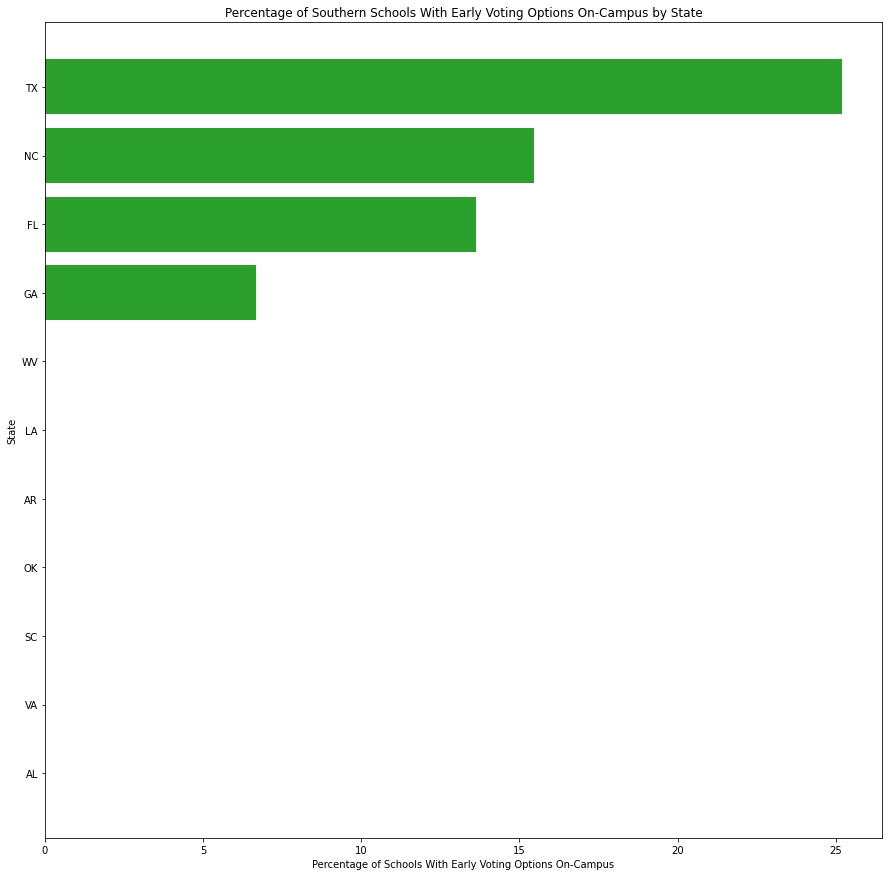

In [153]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
df = early_by_state[early_by_state['Region']=='South']
c = ['C2' if i in states else 'C1' for i in df['STATE']]
ax.barh(y=df['STATE'],width=df.pct,color=c)
ax.set_title('Percentage of Southern Schools With Early Voting Options On-Campus by State')
ax.set_xlabel('Percentage of Schools With Early Voting Options On-Campus')
ax.set_ylabel('State')
ax.grid(False)

In [154]:
early_by_state['Region'].unique()

array(['South', 'North East', 'West', 'Mid West'], dtype=object)

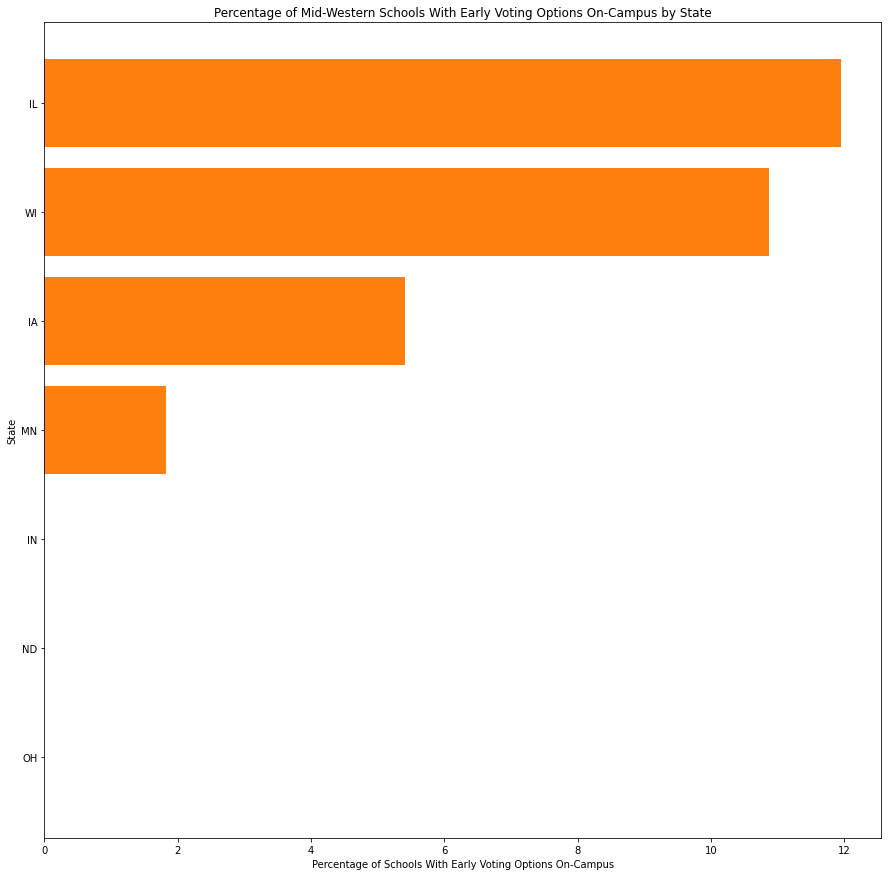

In [155]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
df = early_by_state[early_by_state['Region']=='Mid West']
c = ['C2' if i in states else 'C1' for i in df['STATE']]
ax.barh(y=df['STATE'],width=df.pct,color=c)
ax.set_title('Percentage of Mid-Western Schools With Early Voting Options On-Campus by State')
ax.set_xlabel('Percentage of Schools With Early Voting Options On-Campus')
ax.set_ylabel('State')
ax.grid(False)

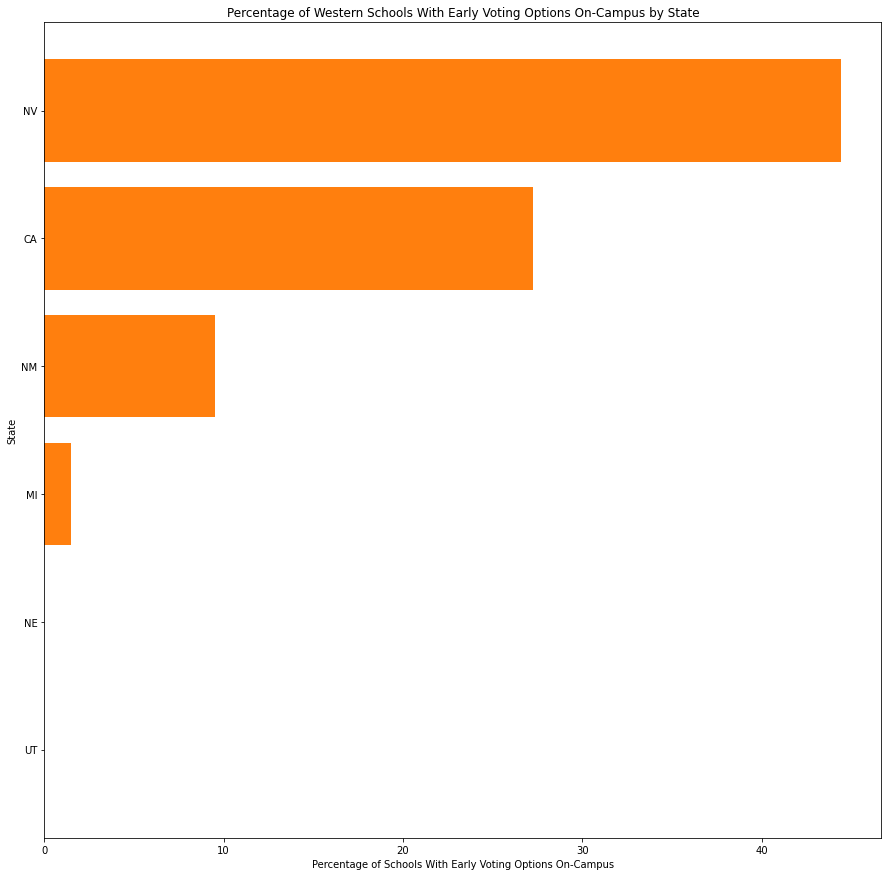

In [156]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
df = early_by_state[early_by_state['Region']=='West']
c = ['C2' if i in states else 'C1' for i in df['STATE']]
ax.barh(y=df['STATE'],width=df.pct,color=c)
ax.set_title('Percentage of Western Schools With Early Voting Options On-Campus by State')
ax.set_xlabel('Percentage of Schools With Early Voting Options On-Campus')
ax.set_ylabel('State')
ax.grid(False)

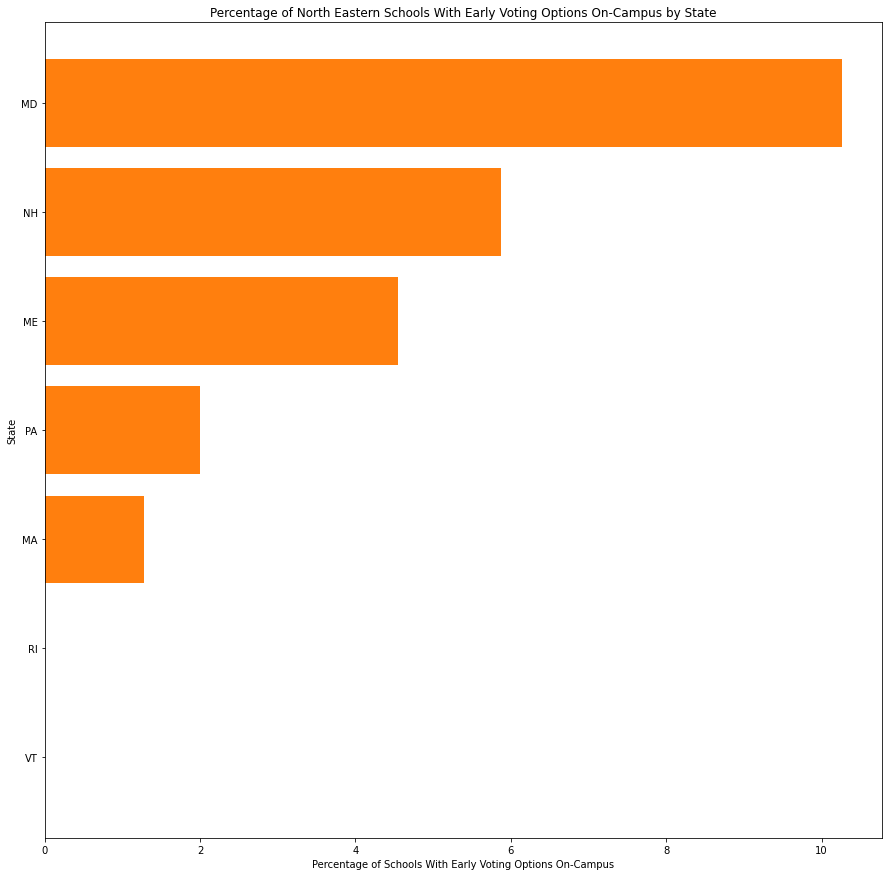

In [157]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
df = early_by_state[early_by_state['Region']=='North East']
c = ['C2' if i in states else 'C1' for i in df['STATE']]
ax.barh(y=df['STATE'],width=df.pct,color=c)
ax.set_title('Percentage of North Eastern Schools With Early Voting Options On-Campus by State')
ax.set_xlabel('Percentage of Schools With Early Voting Options On-Campus')
ax.set_ylabel('State')
ax.grid(False)

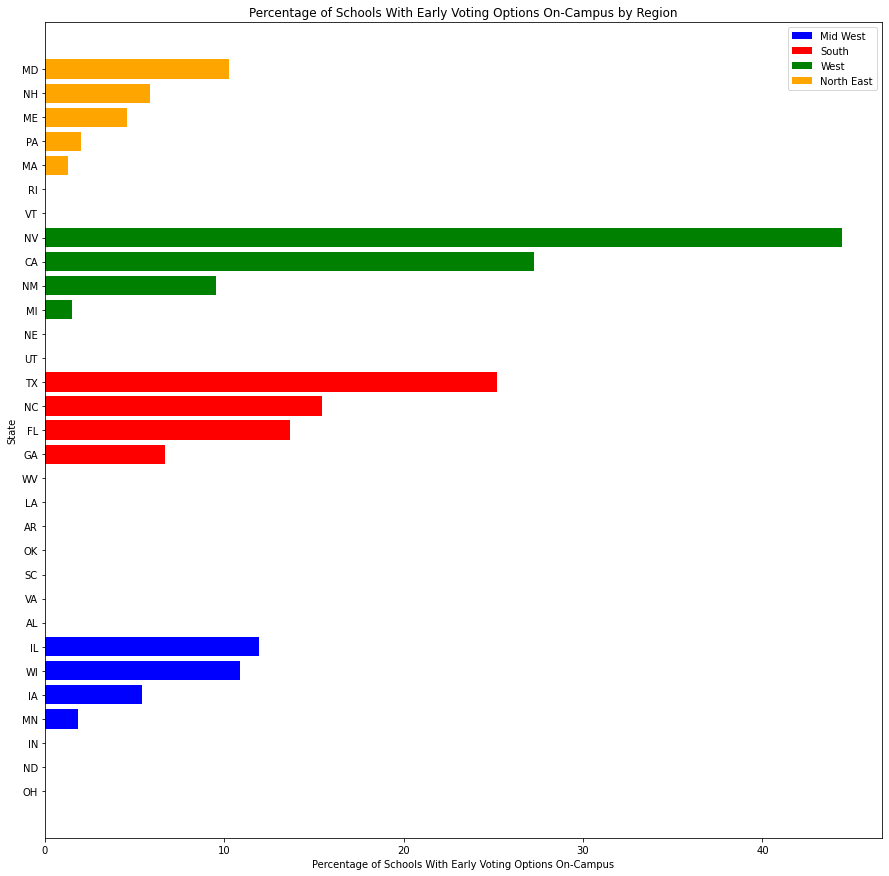

In [158]:
fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
df = early_by_state
dfS = df[df['Region'] == 'South']
dfMW = df[df['Region'] == 'Mid West']
dfNE = df[df['Region'] == 'North East']
dfW = df[df['Region'] == 'West']
ax.barh(y=dfMW['STATE'],width=dfMW.pct,color="blue", label= 'Mid West')
ax.barh(y=dfS['STATE'],width=dfS.pct,color="red", label = 'South')
ax.barh(y=dfW['STATE'],width=dfW.pct,color="green", label = 'West')
ax.barh(y=dfNE['STATE'],width=dfNE.pct,color="orange", label = 'North East')
ax.set_title('Percentage of Schools With Early Voting Options On-Campus by Region')
ax.set_xlabel('Percentage of Schools With Early Voting Options On-Campus')
ax.set_ylabel('State')
ax.legend()
ax.grid(False)